
## 1. Tensors

In [ ]:
import torch
import numpy as np
from torch import nn

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Numpy
a = np.zeros((5,5)) # 5x5 zero Matrix
b = np.ones((5,5)) # 5x5 ones  Matrix
c = np.random.rand(5,5) # 5x5 random Matrix 

print(a)
print(b)
print(c)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[0.837048   0.60093064 0.57334265 0.33944183 0.6978507 ]
 [0.06567256 0.68372126 0.1320196  0.72863137 0.36563264]
 [0.94457699 0.00288996 0.4288324  0.98657529 0.14381706]
 [0.74250896 0.9064287  0.15484291 0.53133911 0.41739447]
 [0.78390429 0.14420735 0.39309681 0.32183039 0.91485756]]


In [ ]:
# Pytorch
q = torch.zeros((5,5))
p = torch.ones((5,5))
r = torch.rand((5,5))

print(q)
print(p)
print(r)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
tensor([[0.0886, 0.7538, 0.6960, 0.6997, 0.8421],
        [0.1442, 0.7614, 0.8007, 0.0600, 0.2722],
        [0.3938, 0.1616, 0.8353, 0.1772, 0.2406],
        [0.9120, 0.8453, 0.4606, 0.3511, 0.5998],
        [0.6719, 0.0721, 0.8829, 0.9798, 0.5669]])


In [ ]:
s = torch.from_numpy(c)
s

tensor([[0.8370, 0.6009, 0.5733, 0.3394, 0.6979],
        [0.0657, 0.6837, 0.1320, 0.7286, 0.3656],
        [0.9446, 0.0029, 0.4288, 0.9866, 0.1438],
        [0.7425, 0.9064, 0.1548, 0.5313, 0.4174],
        [0.7839, 0.1442, 0.3931, 0.3218, 0.9149]], dtype=torch.float64)

In [ ]:
s[0,0]

tensor(0.8370, dtype=torch.float64)

In [ ]:
s[0,0].item()

0.8370479998707208

In [ ]:
s+r

tensor([[0.9257, 1.3548, 1.2693, 1.0391, 1.5400],
        [0.2099, 1.4452, 0.9327, 0.7886, 0.6378],
        [1.3384, 0.1645, 1.2642, 1.1638, 0.3844],
        [1.6545, 1.7517, 0.6155, 0.8824, 1.0172],
        [1.4558, 0.2163, 1.2760, 1.3017, 1.4818]], dtype=torch.float64)

In [ ]:
(s+r).to(device)

tensor([[0.9257, 1.3548, 1.2693, 1.0391, 1.5400],
        [0.2099, 1.4452, 0.9327, 0.7886, 0.6378],
        [1.3384, 0.1645, 1.2642, 1.1638, 0.3844],
        [1.6545, 1.7517, 0.6155, 0.8824, 1.0172],
        [1.4558, 0.2163, 1.2760, 1.3017, 1.4818]], device='cuda:0',
       dtype=torch.float64)

In [ ]:
s.float()

tensor([[0.8370, 0.6009, 0.5733, 0.3394, 0.6979],
        [0.0657, 0.6837, 0.1320, 0.7286, 0.3656],
        [0.9446, 0.0029, 0.4288, 0.9866, 0.1438],
        [0.7425, 0.9064, 0.1548, 0.5313, 0.4174],
        [0.7839, 0.1442, 0.3931, 0.3218, 0.9149]])

In [ ]:
# float64 가 나오면  float을 붙여 바꿔줌
(s+r).float().to(device)

tensor([[0.9257, 1.3548, 1.2693, 1.0391, 1.5400],
        [0.2099, 1.4452, 0.9327, 0.7886, 0.6378],
        [1.3384, 0.1645, 1.2642, 1.1638, 0.3844],
        [1.6545, 1.7517, 0.6155, 0.8824, 1.0172],
        [1.4558, 0.2163, 1.2760, 1.3017, 1.4818]], device='cuda:0')

##   2.Linear Regression with Pytorch

In [ ]:
# Data generation with hands
x = torch.arange(0,1,0.1)
y = 2*x -1 + torch.randn(len(x))


tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000])

In [ ]:
import matplotlib.pyplot as plt

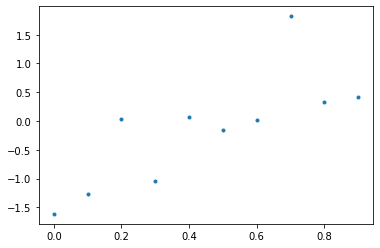

In [ ]:
plt.plot(x,y,'.')

In [ ]:
# For validation
x_val = torch.arange(0,1,0.2)
y_val = 2*x_val -1 + 0.1 *torch.randn(len(x_val))

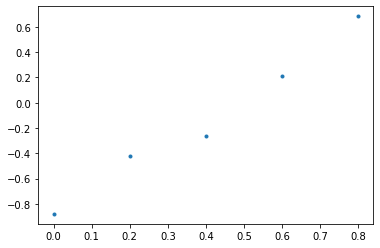

In [ ]:
plt.plot(x_val,y_val,'.')

In [ ]:
# For test ...

In [ ]:
# PtTorch`s way to generate Dataset
from torch.utils.data import Dataset,DataLoader

In [ ]:
class LinearData(Dataset):
  def __init__(self,range):
    start,end,step = range
    self.x = torch.arange(start,end,step).float()
    self.y = 2*self.x - 1 + 0.1 * torch.randn(len(self.x))
    self.y = self.y.view(len(self.x),1)
    self.input = self.x.view(len(self.x),1)
  def __len__(self):
    return len(self.x)
  
  def __getitem__(self,idx):
    return self.input[idx],self.y[idx]

In [ ]:
train_dataset = LinearData((0,1,0.001))
train_dataset[:5]

(tensor([[0.0000],
         [0.0010],
         [0.0020],
         [0.0030],
         [0.0040]]), tensor([[-0.9874],
         [-1.0807],
         [-1.0950],
         [-1.0610],
         [-0.9731]]))

In [ ]:
train_loader = DataLoader(train_dataset,batch_size=100,shuffle=True)

for x,y in train_loader:
  print(x[:10])
  print(y[:10])
  break

tensor([[0.8370],
        [0.3700],
        [0.4310],
        [0.9550],
        [0.4540],
        [0.0390],
        [0.9240],
        [0.1540],
        [0.1670],
        [0.2030]])
tensor([[ 0.6172],
        [-0.3766],
        [ 0.0249],
        [ 1.1506],
        [-0.1948],
        [-0.9171],
        [ 0.7434],
        [-0.8040],
        [-0.5893],
        [-0.7794]])


In [ ]:
val_dataset = LinearData((0,1,0.1))
# val 은  shuffle 안하는데 성능에좋다
val_loader = DataLoader(val_dataset,batch_size = 10)

In [ ]:
test_dataset = LinearData((0,10,1))
test_loader = DataLoader(test_dataset, batch_size = 10)

In [ ]:
# Neural Network
class LinearNet(nn.Module):
  def __init__(self):
    super(LinearNet,self).__init__() # weight 초기화 등등 때문에 상속 받아야한다 . 
    self.model = nn.Sequential(
        nn.Linear(1,1) # input 1 , output 1
    )
  def forward(self,x):
    return self.model(x)    

In [ ]:
net = LinearNet().to(device)

In [ ]:
criterion = nn.MSELoss(())
optimizer = torch.optim.Adam(net.parameters(),lr=0.01)

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [ ]:
def train(dataloader, model, critertion, optimizer):
  size = len(dataloader.dataset)
  model.train() 

  for batch, data in enumerate(dataloader):
    X,y = data # Data in CPU 
    X,y = X.to(device), y.to(device) # to GPU

    # Forward
    out = model(X) # forward
    loss = criterion(out,y) # Calculate loss

    # Eroor backpropagation
    optimizer.zero_grad() # Gradient 초기화
    loss.backward() # Backward loss 계산
    optimizer.step() # Gradient 업데이트
    if batch % 5 == 0:
      print(f"#{batch} Batch : Training Loss:{loss:>8f}")

In [ ]:
epochs = 10
for epoch in range(epochs):
  print(f"#{epoch} ---------------Epoch------------------------")
  train(train_loader,net,criterion,optimizer)
  print()

#0 ---------------Epoch------------------------
#0 Batch : Training Loss:40.568756
#5 Batch : Training Loss:42.006401

#1 ---------------Epoch------------------------
#0 Batch : Training Loss:30.717936
#5 Batch : Training Loss:32.031059

#2 ---------------Epoch------------------------
#0 Batch : Training Loss:22.017361
#5 Batch : Training Loss:15.819109

#3 ---------------Epoch------------------------
#0 Batch : Training Loss:13.214447
#5 Batch : Training Loss:10.937173

#4 ---------------Epoch------------------------
#0 Batch : Training Loss:12.029088
#5 Batch : Training Loss:8.962704

#5 ---------------Epoch------------------------
#0 Batch : Training Loss:9.632392
#5 Batch : Training Loss:8.544584

#6 ---------------Epoch------------------------
#0 Batch : Training Loss:8.469035
#5 Batch : Training Loss:9.633257

#7 ---------------Epoch------------------------
#0 Batch : Training Loss:8.316459
#5 Batch : Training Loss:6.427209

#8 ---------------Epoch------------------------
#0 Batc

In [ ]:
def val_check(dataloader, model, critertion):
  size = len(dataloader.dataset)
  model.eval() # evaluation 모드 (수정 X,계산)

  for batch, data in enumerate(dataloader):
    X,y = data # Data in CPU 
    X,y = X.to(device), y.to(device) # to GPU

    # Forward
    out = model(X) # forward
    loss = criterion(out,y) # Calculate loss


    print(f"Validity Loss :{loss:>8f}")

In [ ]:
epochs = 100
for epoch in range(epochs):
  print(f"#{epoch} ---------------Epoch------------------------")
  train(train_loader,net,criterion,optimizer)
  val_check(val_loader,net,criterion)
  print()

#0 ---------------Epoch------------------------
#0 Batch : Training Loss:6.879791
#5 Batch : Training Loss:5.416719
Validity Loss :0.985682

#1 ---------------Epoch------------------------
#0 Batch : Training Loss:5.976114
#5 Batch : Training Loss:5.096848
Validity Loss :0.929561

#2 ---------------Epoch------------------------
#0 Batch : Training Loss:5.848579
#5 Batch : Training Loss:6.404454
Validity Loss :0.875842

#3 ---------------Epoch------------------------
#0 Batch : Training Loss:5.156446
#5 Batch : Training Loss:5.351152
Validity Loss :0.824622

#4 ---------------Epoch------------------------
#0 Batch : Training Loss:5.344440
#5 Batch : Training Loss:4.778943
Validity Loss :0.775565

#5 ---------------Epoch------------------------
#0 Batch : Training Loss:4.729265
#5 Batch : Training Loss:3.628485
Validity Loss :0.728379

#6 ---------------Epoch------------------------
#0 Batch : Training Loss:4.490667
#5 Batch : Training Loss:3.979174
Validity Loss :0.683605

#7 ----------

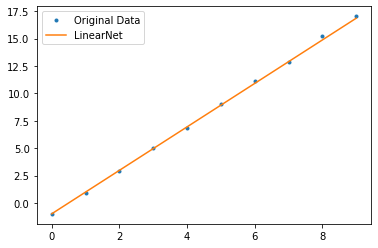

In [ ]:
for X,y in test_loader:
  X_gpu = X.float().to(device)
  x = X
  out = net(X_gpu).cpu().detach()  # matplotlib를 사용하기 위해서는 CPU여야만 한다 / detach()는 tensor -> array로 바꿔줌

  plt.plot(x,y,'.',label="Original Data")
  plt.plot(x,out,label="LinearNet")
  plt.legend()
  plt.show()
  break

In [ ]:
for param in net.parameters():
  print(param[:])
  # torch 자체에도 bias가 있어서 따로 안넣어도 되었다.

tensor([[1.9824]], device='cuda:0', grad_fn=<SliceBackward>)
tensor([-0.9902], device='cuda:0', grad_fn=<SliceBackward>)
